# CatBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_csv("hitters.csv")
df = df.dropna()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [4]:
y = df["Salary"]
X = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float64")
X = pd.concat([X, dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.029229
0:	learn: 438.1974206	total: 155ms	remaining: 2m 34s
1:	learn: 432.4168868	total: 156ms	remaining: 1m 17s
2:	learn: 426.3836690	total: 157ms	remaining: 52.3s
3:	learn: 420.2261014	total: 158ms	remaining: 39.4s
4:	learn: 414.9976675	total: 159ms	remaining: 31.7s
5:	learn: 409.6125323	total: 160ms	remaining: 26.6s
6:	learn: 403.9277911	total: 161ms	remaining: 22.9s
7:	learn: 398.4395285	total: 162ms	remaining: 20.1s
8:	learn: 392.4517081	total: 163ms	remaining: 18s
9:	learn: 387.4871123	total: 165ms	remaining: 16.3s
10:	learn: 382.6230510	total: 166ms	remaining: 14.9s
11:	learn: 378.1012454	total: 167ms	remaining: 13.7s
12:	learn: 372.6002306	total: 168ms	remaining: 12.8s
13:	learn: 368.4682192	total: 169ms	remaining: 11.9s
14:	learn: 364.0565766	total: 170ms	remaining: 11.2s
15:	learn: 359.5683249	total: 171ms	remaining: 10.5s
16:	learn: 355.1782794	total: 173ms	remaining: 9.98s
17:	learn: 350.4689946	total: 174ms	remaining: 9.48s
18:	learn: 346.2553348	tot

183:	learn: 138.4584181	total: 343ms	remaining: 1.52s
184:	learn: 138.2093063	total: 344ms	remaining: 1.52s
185:	learn: 137.8406250	total: 345ms	remaining: 1.51s
186:	learn: 137.7280816	total: 346ms	remaining: 1.5s
187:	learn: 137.2465993	total: 347ms	remaining: 1.5s
188:	learn: 136.7894765	total: 348ms	remaining: 1.49s
189:	learn: 136.4857311	total: 349ms	remaining: 1.49s
190:	learn: 136.0043713	total: 350ms	remaining: 1.48s
191:	learn: 135.7523177	total: 351ms	remaining: 1.48s
192:	learn: 135.3372675	total: 352ms	remaining: 1.47s
193:	learn: 135.0202084	total: 353ms	remaining: 1.47s
194:	learn: 134.7757422	total: 354ms	remaining: 1.46s
195:	learn: 134.3546545	total: 355ms	remaining: 1.46s
196:	learn: 133.9623627	total: 356ms	remaining: 1.45s
197:	learn: 133.2648869	total: 357ms	remaining: 1.45s
198:	learn: 132.9318972	total: 358ms	remaining: 1.44s
199:	learn: 132.5119098	total: 359ms	remaining: 1.44s
200:	learn: 131.8954412	total: 360ms	remaining: 1.43s
201:	learn: 131.6115557	total:

354:	learn: 83.4823620	total: 501ms	remaining: 910ms
355:	learn: 83.1595406	total: 502ms	remaining: 907ms
356:	learn: 82.7280745	total: 503ms	remaining: 905ms
357:	learn: 82.6210086	total: 504ms	remaining: 903ms
358:	learn: 82.3077194	total: 505ms	remaining: 901ms
359:	learn: 81.9112073	total: 506ms	remaining: 899ms
360:	learn: 81.5518193	total: 507ms	remaining: 897ms
361:	learn: 81.4267033	total: 508ms	remaining: 895ms
362:	learn: 81.0255982	total: 509ms	remaining: 893ms
363:	learn: 80.6891175	total: 510ms	remaining: 891ms
364:	learn: 80.4390711	total: 511ms	remaining: 889ms
365:	learn: 80.1232319	total: 512ms	remaining: 887ms
366:	learn: 80.0808756	total: 513ms	remaining: 885ms
367:	learn: 79.7090424	total: 514ms	remaining: 883ms
368:	learn: 79.3969152	total: 515ms	remaining: 881ms
369:	learn: 79.0731259	total: 516ms	remaining: 879ms
370:	learn: 78.9862934	total: 517ms	remaining: 877ms
371:	learn: 78.7730476	total: 518ms	remaining: 874ms
372:	learn: 78.6302158	total: 519ms	remaining:

524:	learn: 51.1767477	total: 659ms	remaining: 596ms
525:	learn: 51.0961343	total: 660ms	remaining: 595ms
526:	learn: 50.9995340	total: 661ms	remaining: 593ms
527:	learn: 50.8846082	total: 662ms	remaining: 592ms
528:	learn: 50.7478794	total: 663ms	remaining: 590ms
529:	learn: 50.5116322	total: 664ms	remaining: 589ms
530:	learn: 50.2760468	total: 665ms	remaining: 587ms
531:	learn: 50.1040144	total: 666ms	remaining: 586ms
532:	learn: 49.8827812	total: 667ms	remaining: 584ms
533:	learn: 49.8255711	total: 668ms	remaining: 583ms
534:	learn: 49.7890438	total: 669ms	remaining: 581ms
535:	learn: 49.6290340	total: 670ms	remaining: 580ms
536:	learn: 49.3965889	total: 671ms	remaining: 578ms
537:	learn: 49.1641285	total: 672ms	remaining: 577ms
538:	learn: 48.9654180	total: 673ms	remaining: 575ms
539:	learn: 48.9278341	total: 673ms	remaining: 574ms
540:	learn: 48.8457405	total: 674ms	remaining: 572ms
541:	learn: 48.8041804	total: 675ms	remaining: 571ms
542:	learn: 48.7179291	total: 676ms	remaining:

693:	learn: 31.1002943	total: 817ms	remaining: 360ms
694:	learn: 31.0204694	total: 818ms	remaining: 359ms
695:	learn: 30.8638326	total: 820ms	remaining: 358ms
696:	learn: 30.8558418	total: 821ms	remaining: 357ms
697:	learn: 30.7168233	total: 822ms	remaining: 356ms
698:	learn: 30.6741149	total: 823ms	remaining: 355ms
699:	learn: 30.5633505	total: 824ms	remaining: 353ms
700:	learn: 30.3980151	total: 826ms	remaining: 352ms
701:	learn: 30.3868882	total: 826ms	remaining: 351ms
702:	learn: 30.3095110	total: 828ms	remaining: 350ms
703:	learn: 30.2001626	total: 829ms	remaining: 348ms
704:	learn: 30.1086639	total: 830ms	remaining: 347ms
705:	learn: 30.0062050	total: 831ms	remaining: 346ms
706:	learn: 29.9366332	total: 832ms	remaining: 345ms
707:	learn: 29.8514157	total: 832ms	remaining: 343ms
708:	learn: 29.8410197	total: 833ms	remaining: 342ms
709:	learn: 29.7691296	total: 835ms	remaining: 341ms
710:	learn: 29.6347315	total: 836ms	remaining: 340ms
711:	learn: 29.5690771	total: 837ms	remaining:

852:	learn: 20.3832418	total: 976ms	remaining: 168ms
853:	learn: 20.3012184	total: 977ms	remaining: 167ms
854:	learn: 20.2920333	total: 978ms	remaining: 166ms
855:	learn: 20.2053869	total: 979ms	remaining: 165ms
856:	learn: 20.1658977	total: 980ms	remaining: 164ms
857:	learn: 20.1100216	total: 981ms	remaining: 162ms
858:	learn: 20.0083729	total: 982ms	remaining: 161ms
859:	learn: 19.9455311	total: 983ms	remaining: 160ms
860:	learn: 19.8796059	total: 984ms	remaining: 159ms
861:	learn: 19.8565398	total: 985ms	remaining: 158ms
862:	learn: 19.7320152	total: 986ms	remaining: 157ms
863:	learn: 19.6553629	total: 987ms	remaining: 155ms
864:	learn: 19.5653904	total: 989ms	remaining: 154ms
865:	learn: 19.5044019	total: 990ms	remaining: 153ms
866:	learn: 19.4952821	total: 991ms	remaining: 152ms
867:	learn: 19.4417196	total: 992ms	remaining: 151ms
868:	learn: 19.3928280	total: 993ms	remaining: 150ms
869:	learn: 19.3310543	total: 994ms	remaining: 149ms
870:	learn: 19.2860856	total: 995ms	remaining:

In [6]:
y_pred = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

350.2683163098795

In [7]:
r2_score(y_test, y_pred)

0.43324903699954187

In [8]:
params = {
    "iterations": [200,500,100],
    "learning_rate": [0.01,0.1],
    "depth": [3,6,8],
}
catb = CatBoostRegressor()
model_cv = GridSearchCV(catb, params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.5s


0:	learn: 425.7900818	total: 513us	remaining: 102ms
1:	learn: 404.8723520	total: 931us	remaining: 92.2ms
2:	learn: 387.4057666	total: 1.32ms	remaining: 86.6ms
3:	learn: 372.2801584	total: 1.72ms	remaining: 84.1ms
4:	learn: 358.9204229	total: 2.12ms	remaining: 82.8ms
5:	learn: 347.0083933	total: 2.57ms	remaining: 83ms
6:	learn: 336.0130818	total: 3.04ms	remaining: 83.8ms
7:	learn: 324.3923300	total: 3.45ms	remaining: 82.9ms
8:	learn: 314.8690957	total: 3.92ms	remaining: 83.3ms
9:	learn: 308.5075563	total: 4.38ms	remaining: 83.3ms
10:	learn: 298.8587285	total: 4.81ms	remaining: 82.7ms
11:	learn: 294.7655438	total: 5.22ms	remaining: 81.8ms
12:	learn: 288.0697862	total: 5.61ms	remaining: 80.7ms
13:	learn: 282.6697154	total: 5.99ms	remaining: 79.6ms
14:	learn: 277.6121667	total: 6.41ms	remaining: 79ms
15:	learn: 273.4383979	total: 6.86ms	remaining: 78.9ms
16:	learn: 269.1556201	total: 7.29ms	remaining: 78.5ms
17:	learn: 264.8098704	total: 7.74ms	remaining: 78.2ms
18:	learn: 261.6700768	tota

[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   24.8s finished


In [9]:
model_cv.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [10]:
model_tuned = CatBoostRegressor(depth=3, iterations=200, learning_rate=0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 594us	remaining: 118ms
1:	learn: 404.8723520	total: 1.07ms	remaining: 106ms
2:	learn: 387.4057666	total: 1.52ms	remaining: 99.7ms
3:	learn: 372.2801584	total: 1.98ms	remaining: 97.1ms
4:	learn: 358.9204229	total: 2.44ms	remaining: 95.4ms
5:	learn: 347.0083933	total: 3ms	remaining: 97.2ms
6:	learn: 336.0130818	total: 3.46ms	remaining: 95.3ms
7:	learn: 324.3923300	total: 3.94ms	remaining: 94.5ms
8:	learn: 314.8690957	total: 4.35ms	remaining: 92.4ms
9:	learn: 308.5075563	total: 4.79ms	remaining: 91ms
10:	learn: 298.8587285	total: 5.27ms	remaining: 90.5ms
11:	learn: 294.7655438	total: 5.89ms	remaining: 92.3ms
12:	learn: 288.0697862	total: 6.39ms	remaining: 91.9ms
13:	learn: 282.6697154	total: 6.95ms	remaining: 92.3ms
14:	learn: 277.6121667	total: 7.6ms	remaining: 93.8ms
15:	learn: 273.4383979	total: 8.13ms	remaining: 93.5ms
16:	learn: 269.1556201	total: 8.68ms	remaining: 93.5ms
17:	learn: 264.8098704	total: 9.33ms	remaining: 94.4ms
18:	learn: 261.6700768	total:

In [11]:
y_pred = model_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.3125832615482

In [12]:
r2_score(y_test, y_pred)

0.4523585058891635

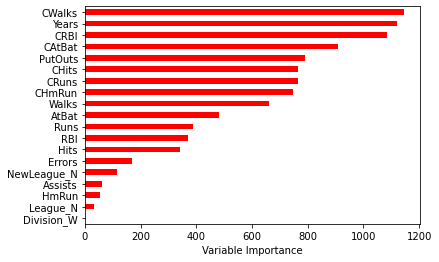

In [13]:
Importance = pd.DataFrame({"Importance": model_tuned.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None